In [1]:
import igimf as ii

In [2]:
import igimf.instance as inst

In [3]:
import numpy as np
mstar_l=0.07
mstar_u=150
mstar_v = np.logspace(np.log10(mstar_l),np.log10(mstar_u), num=50)


### This is what happens when you run instance

In [4]:
massfrac, SFR, Mtot, stellar_IMF, ecl_MF, t_IGIMF = inst.main()


At a time t characterized by:
SFR=1.00e+00
and 
Mtot=1.00e+05


dictionary of an e.cl.'s stellar IMF

{
    "metal_mass_fraction": 0.01,
    "SFR": 1.0,
    "solar_metallicity": 0.0134,
    "delta_alpha": 63.0,
    "m_star_max": 150.1,
    "m_star_min": 0.07,
    "suppress_warnings": true,
    "M_ecl_max": 10000000000.0,
    "M_ecl_min": 5.0,
    "delta_t": 10000000.0,
    "Mtot": 10000000.0,
    "metallicity": -0.1271047983648076,
    "M_ecl": 100000.0,
    "alpha_1": 1.0858,
    "alpha_2": 2.0858,
    "alpha_3": 1.9732941845738599,
    "k_star": 14266.715506785735,
    "m_max": 148.73104394022027,
    "IMF_func": "<numpy.vectorize object at 0x10ee049d0>",
    "IMF_weighted_func": "<numpy.vectorize object at 0x10ee04ac0>"
}


dictionary of a galaxy's ECMF

{
    "metal_mass_fraction": 0.01,
    "SFR": 1.0,
    "solar_metallicity": 0.0134,
    "delta_alpha": 63.0,
    "m_star_max": 150.1,
    "m_star_min": 0.07,
    "suppress_warnings": true,
    "M_ecl_max": 10000000000.0,
    "M_ecl

In [5]:
t_IGIMF.IGIMF_func(mstar_v)

array([5.36936353e+07, 4.53013056e+07, 3.82206992e+07, 3.22467936e+07,
       2.72066110e+07, 2.29542103e+07, 1.93664610e+07, 1.63394779e+07,
       1.37856131e+07, 1.16309180e+07, 9.81300236e+06, 8.27922743e+06,
       6.98518194e+06, 5.50179876e+06, 3.96929299e+06, 2.86366105e+06,
       2.06599882e+06, 1.49024345e+06, 1.05733993e+06, 7.50647365e+05,
       5.33248341e+05, 3.79056197e+05, 2.69628971e+05, 1.91922847e+05,
       1.36707463e+05, 9.74476500e+04, 6.95139846e+04, 4.96252364e+04,
       3.54544161e+04, 2.53502925e+04, 1.81404395e+04, 1.29918758e+04,
       9.31240502e+03, 6.68073394e+03, 4.79694592e+03, 3.44738185e+03,
       2.47972228e+03, 1.78529701e+03, 1.28651808e+03, 7.26513713e+02,
       5.29405664e+02, 3.86076480e+02, 2.81770778e+02, 2.05804052e+02,
       1.50433467e+02, 1.00428314e+02, 7.38501593e+01, 5.11267090e+01,
       3.56819944e+01, 0.00000000e+00])

In [27]:
from sklearn.model_selection import ParameterGrid

#Mecl_v = np.array([5.,10.,1.e2,1.e3,1.e5,1.e7,1.e8,1.e9,1.e10])
resolution = 20
Mecl_v = np.logspace(np.log10(5),10,num=resolution)
Z_massfrac_v = np.logspace(-8.5,1,num=resolution)
solar_metallicity = 0.0134
Z_massfrac_v *= solar_metallicity
metallicity_v = np.log10(Z_massfrac_v/solar_metallicity)
parameter_space = {'[Z]': metallicity_v,
                   'M_ecl': Mecl_v}
dict_list = list(ParameterGrid(parameter_space))

rho_cl = lambda M_ecl: 10**(0.61 * np.log10(M_ecl) + 2.85)
rho_cl_func = np.vectorize(rho_cl)
rho_cl_v = rho_cl_func(Mecl_v)
parameter_space['rho_cl'] = rho_cl_v

def x_func(Z,rho):
    return -0.14 * Z + 0.99 * np.log10(rho) - 6

def alpha3(x):
    if x < -0.87:
        return 2.3
    else:
        return -0.41 * x + 1.94
alpha3_func = np.vectorize(alpha3)

In [28]:
x_v = []
for pair in dict_list:
    r = rho_cl_func(pair['M_ecl'])
    #print(f"{r = }")
    xval = x_func(pair['[Z]'], r)
    x_v.append(xval)

In [26]:
alpha3_v = alpha3_func(x_v)

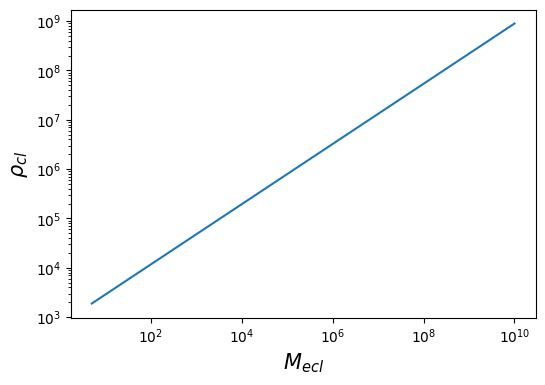

In [9]:
from matplotlib import pyplot as plt
fig, axs = plt.subplots(1, 1, figsize=(6,4))
axs.loglog(Mecl_v, rho_cl_v)
axs.set_ylabel(r'$\rho_{cl}$',fontsize=15)
axs.set_xlabel(r'$M_{ecl}$',fontsize=15)
fig.savefig('figs/Mecl_rhocl.pdf')

In [10]:
np.where(rho_cl_v>1e6)

(array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),)

In [35]:
np.min(alpha3_v)

0.2792950000000003

In [12]:
rho_cl_v[9]

920194.9456692204

In [13]:
Mecl_inv = lambda rho_: np.power(10,(np.log10(rho_) - 2.85)/0.61)
print(Mecl_inv(1e6))
print('mass should exceed this value for Eq.(6) to compute the log')

145859.40117250354
mass should exceed this value for Eq.(6) to compute the log


In [29]:
parameter_space

{'[Z]': array([-8.5, -8. , -7.5, -7. , -6.5, -6. , -5.5, -5. , -4.5, -4. , -3.5,
        -3. , -2.5, -2. , -1.5, -1. , -0.5,  0. ,  0.5,  1. ]),
 'M_ecl': array([5.00000000e+00, 1.54346896e+01, 4.76459284e+01, 1.47080023e+02,
        4.54026898e+02, 1.40155284e+03, 4.32650661e+03, 1.33556573e+04,
        4.12280848e+04, 1.27268538e+05, 3.92870075e+05, 1.21276553e+06,
        3.74373189e+06, 1.15566679e+07, 3.56747162e+07, 1.10125634e+08,
        3.39950995e+08, 1.04940761e+09, 3.23945615e+09, 1.00000000e+10]),
 'rho_cl': array([1.88960793e+03, 3.75823314e+03, 7.47473386e+03, 1.48664663e+04,
        2.95678513e+04, 5.88073732e+04, 1.16961734e+05, 2.32624693e+05,
        4.62666258e+05, 9.20194946e+05, 1.83017180e+06, 3.64002088e+06,
        7.23962199e+06, 1.43988533e+07, 2.86378178e+07, 5.69576336e+07,
        1.13282794e+08, 2.25307666e+08, 4.48113455e+08, 8.91250938e+08])}

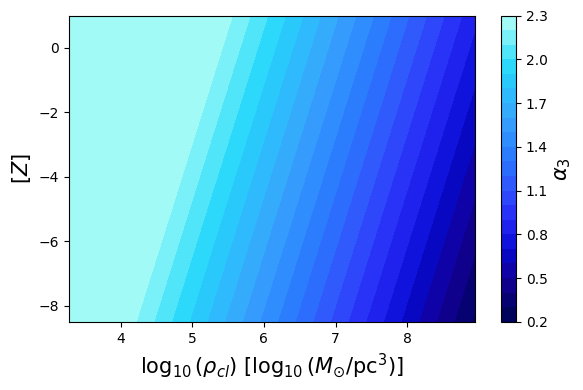

In [44]:
def alpha3_plot(alpha3_v, x_v, parameter_space):
    import colorcet as cc
    fig,ax = plt.subplots(figsize=(6,4))
    x,y = np.meshgrid(np.log10(parameter_space['rho_cl']), parameter_space['[Z]'])
    z = np.array(alpha3_v).reshape(resolution,resolution).T
    cax = ax.contourf(x, y, z, resolution, cmap=cc.cm.CET_L6)
    plt.xlabel(r'$\log_{10}(\rho_{cl})$ [$\log_{10}(M_{\odot}/{\rm pc}^3)$]', fontsize=15)
    plt.ylabel(r'[$Z$]', fontsize=15)
    cbar = fig.colorbar(cax)
    cbar.set_label(r'$\alpha_3$', fontsize=15)
    plt.tight_layout()
    plt.savefig('figs/alpha3plot.pdf')
alpha3_plot(alpha3_v, x_v, parameter_space)